# ML With Python Telco-Customer-Churn

## Sharon Eliyahu

# Part 0:

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("Telco-Customer-Churn - Original.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

##**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   gender            7042 non-null   object 
 2   SeniorCitizen     7042 non-null   int64  
 3   Partner           7042 non-null   object 
 4   Dependents        7042 non-null   object 
 5   tenure            7042 non-null   int64  
 6   PhoneService      7042 non-null   object 
 7   MultipleLines     7042 non-null   object 
 8   InternetService   7042 non-null   object 
 9   OnlineSecurity    7042 non-null   object 
 10  OnlineBackup      7042 non-null   object 
 11  DeviceProtection  7042 non-null   object 
 12  TechSupport       7042 non-null   object 
 13  StreamingTV       7042 non-null   object 
 14  StreamingMovies   7042 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7042 non-null   object 


In [8]:
def to_float(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

In [9]:
data["TotalCharges"] = data["TotalCharges"].apply(lambda x:to_float(x))

#**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [10]:
data.dropna(inplace=True)
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

#Task 1:
**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [11]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#Task 2:**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Churn', ylabel='count'>

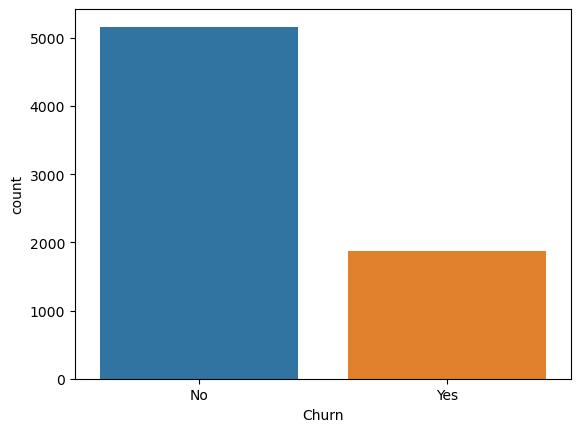

In [13]:
sns.countplot(x=data["Churn"])

#Task 3:
**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

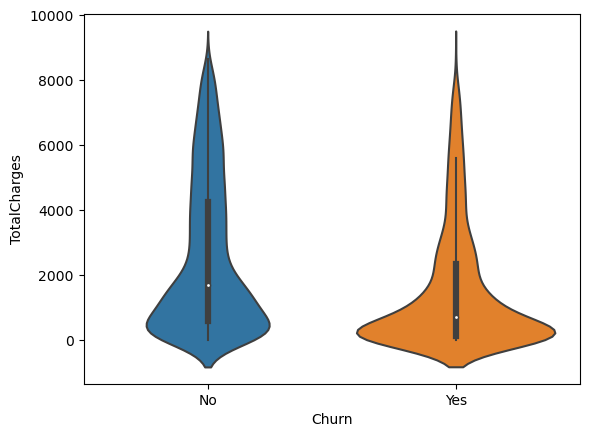

In [14]:
sns.violinplot(data=data,x="Churn",y="TotalCharges")

#Task 4:**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

<Axes: xlabel='Contract', ylabel='TotalCharges'>

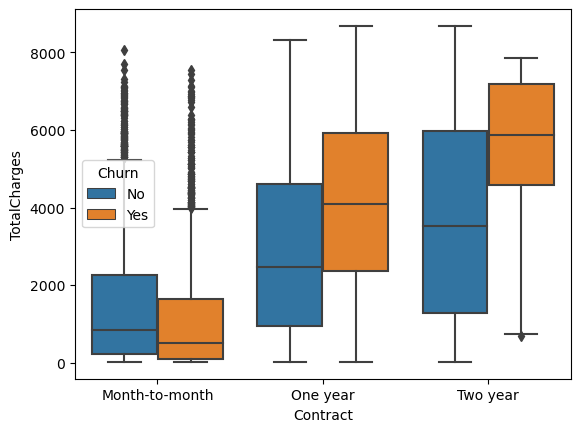

In [15]:
sns.boxplot(data=data,x="Contract",y="TotalCharges",hue="Churn")

##Task 5:
**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

In [16]:
corr_needed = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

In [17]:
data_dummies = pd.get_dummies(data=data[corr_needed])

In [18]:
data_dummies.drop(['Churn_No'],axis=1,inplace=True)

In [19]:
corr_1 = data_dummies.corr()['Churn_Yes'].sort_values()
corr_1

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineSecurity_No internet service        -0.227578
OnlineBackup_No internet service          -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [20]:
corr_1 = corr_1.reset_index()

In [21]:
corr_1.drop(42,axis=0,inplace=True)

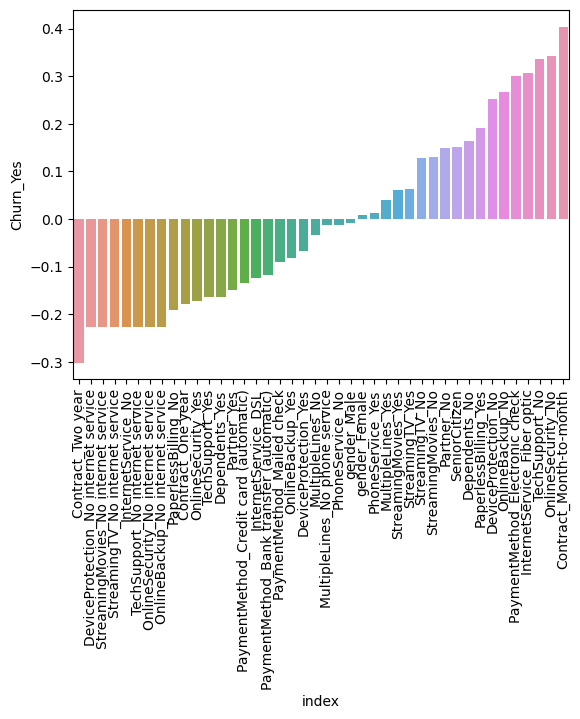

In [22]:
sns.barplot(x=corr_1["index"],y=corr_1["Churn_Yes"])
plt.xticks(rotation=90)
plt.show()

# Part 3: Churn Analysis

**TASK: What are the 3 contract types available?**

In [23]:
data["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

##Task 2:
**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<Axes: xlabel='tenure', ylabel='Count'>

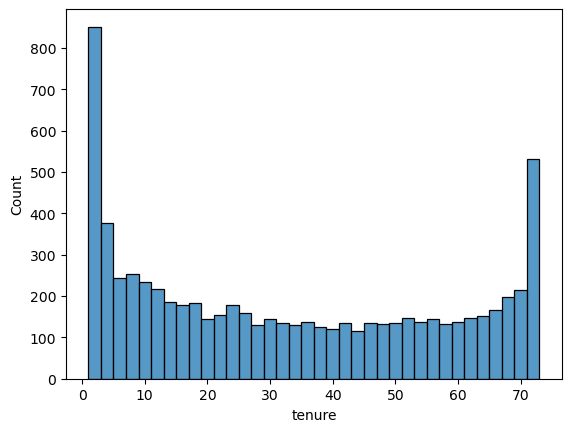

In [24]:
sns.histplot(data=data['tenure'], binwidth=2)

#Task 3:
**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

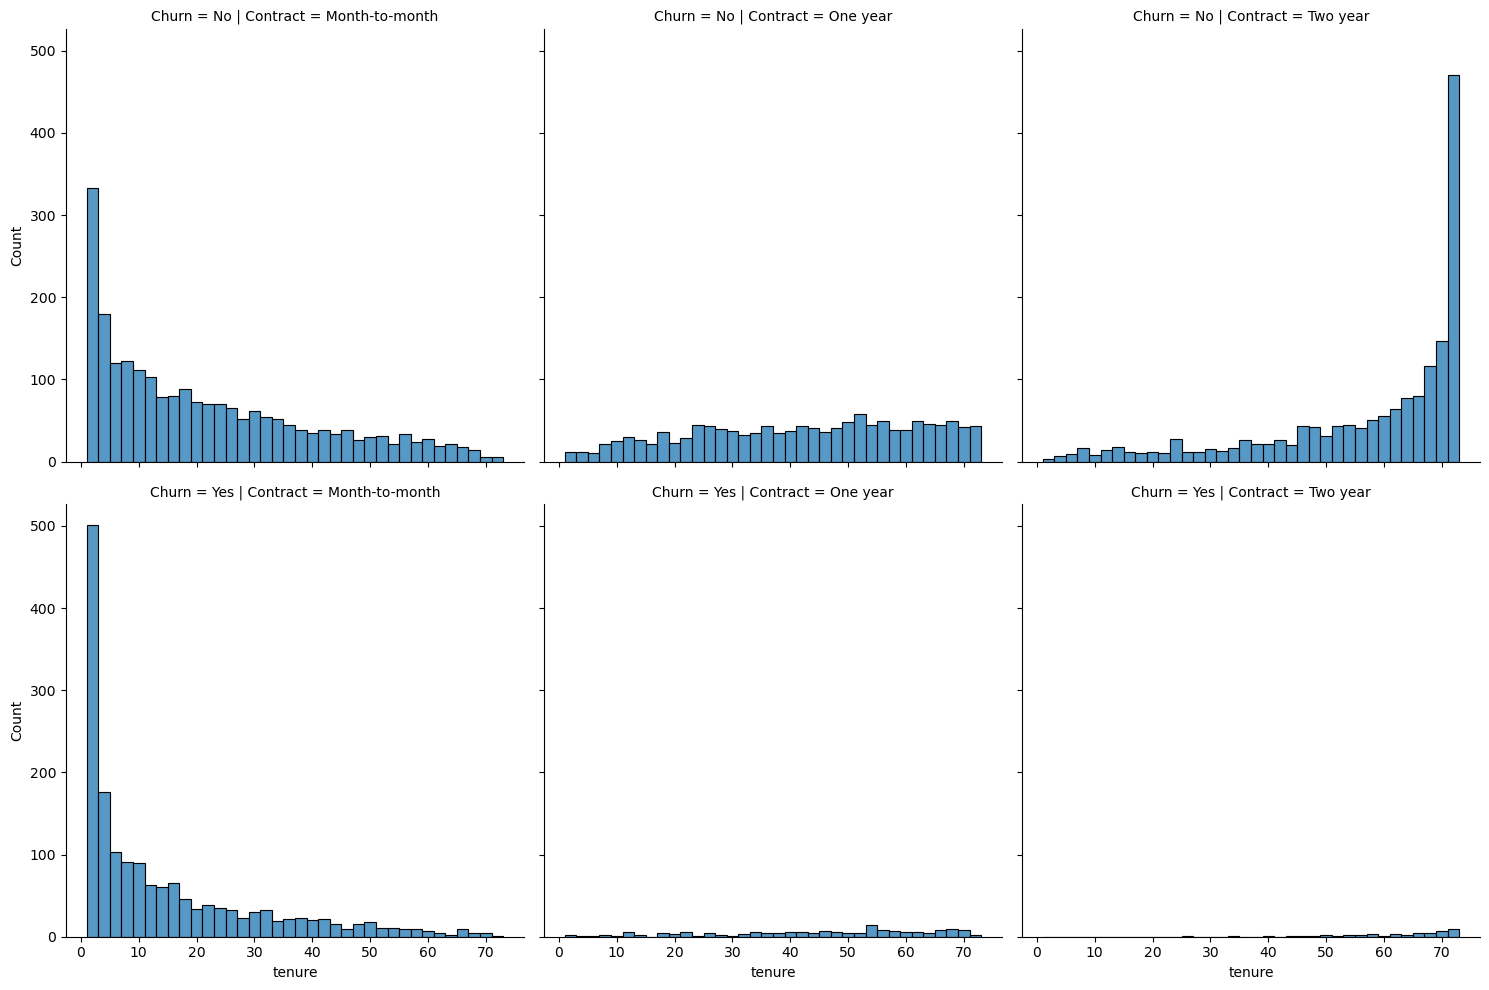

In [25]:
sns.displot(data=data[['Churn','Contract','tenure']],x='tenure',col='Contract',row='Churn',
    binwidth=2, height=5)

#### Task 4: **TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

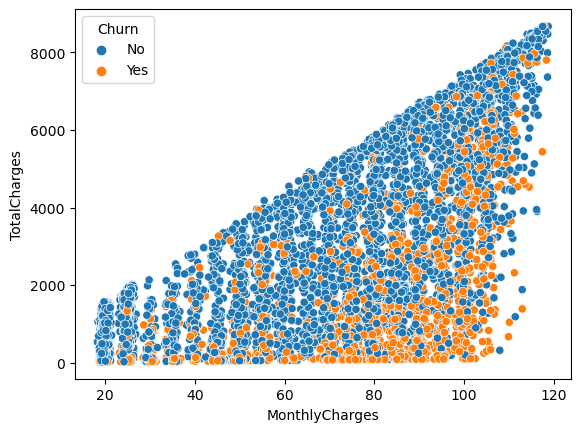

In [26]:
sns.scatterplot(data=data,x='MonthlyCharges',y='TotalCharges',hue='Churn')

#Task 5:
### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [27]:
data_Churn_rate = data[['customerID','tenure','Churn']]
data_Yes_Churn = data_Churn_rate[data_Churn_rate['Churn'] == 'Yes']

In [28]:
data_Churn_rate = data[['customerID','tenure']].groupby('tenure')['customerID'].nunique()
data_Yes_Churn = data_Yes_Churn[['customerID','tenure']].groupby('tenure')['customerID'].nunique()

In [29]:
data_Churn_rate = data_Churn_rate.reset_index()

In [30]:
data_Yes_Churn = data_Yes_Churn.reset_index()

In [31]:
data_Churn_rate['Yes_Churn'] = data_Yes_Churn['customerID']

In [32]:
data_Churn_rate['Churn_Rate'] = (data_Churn_rate['Yes_Churn'] * 100 / data_Churn_rate['customerID'])

In [33]:
data_Churn_rate[['tenure','Churn_Rate']].head()

,tenure,Churn_Rate
0,1,61.990212
1,2,51.680672
2,3,47.000000
3,4,47.159091
4,5,48.120301


#Task 6:
**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

<Axes: xlabel='tenure', ylabel='Churn_Rate'>

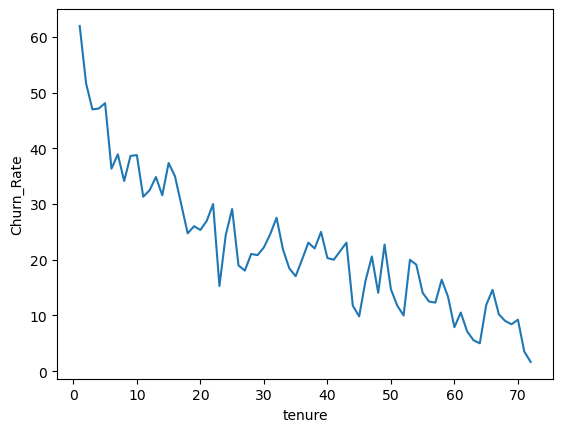

In [34]:
sns.lineplot(data=data_Churn_rate,x='tenure', y='Churn_Rate')

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'  

In [35]:
def cohort(x):
    if x < 48:
        if x < 24:
            if x < 12:
                return '0-12 Months'
            else:
                return '12-24 Months'
        else:
            return '24-48 Months'
    else:
        return 'Over 48 Months' 

In [36]:
data['Tenure Cohort'] = data['tenure'].apply(lambda x: cohort(x))

In [37]:
data[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7038,24,24-48 Months
7039,72,Over 48 Months
7040,11,0-12 Months
7041,4,0-12 Months


#Task 6:
**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

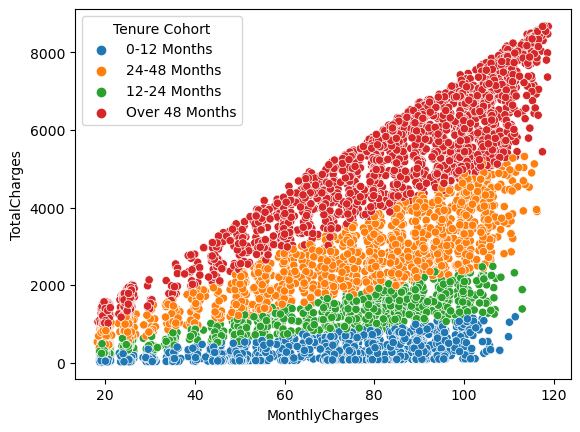

In [38]:
sns.scatterplot(data=data,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort')

#Task 7:
**TASK: Create a count plot showing the churn count per cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

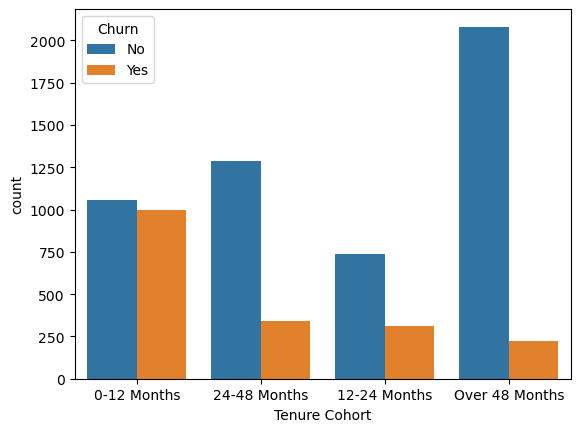

In [39]:
sns.countplot(data=data,x='Tenure Cohort',hue='Churn')

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

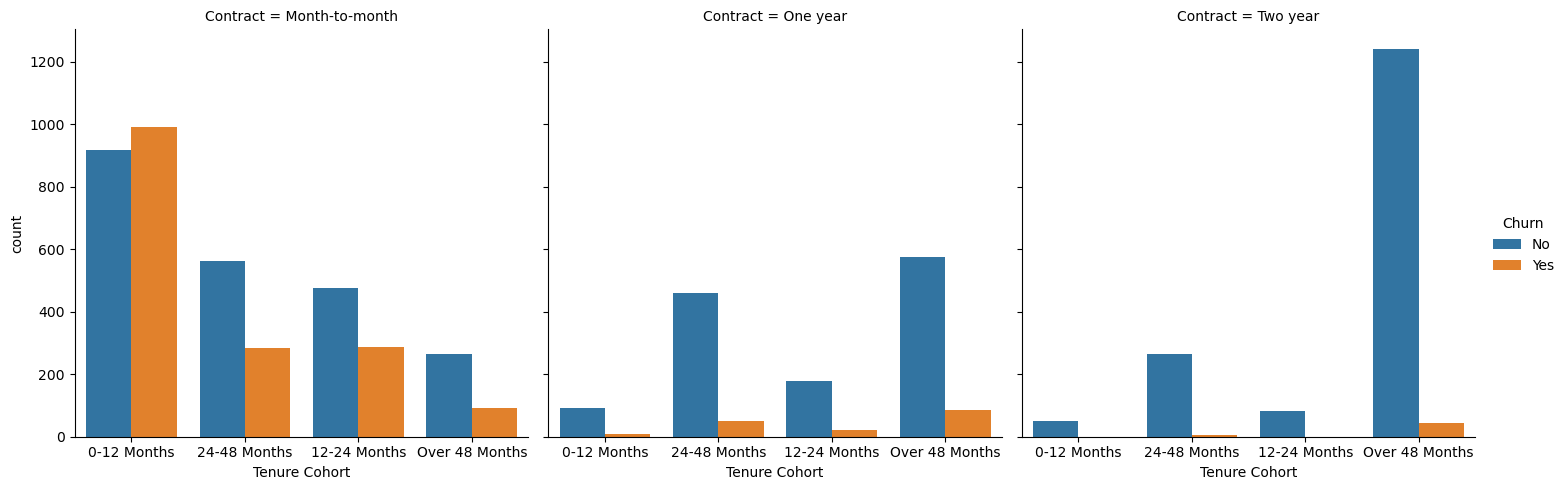

In [40]:
sns.catplot(data=data,x='Tenure Cohort',col='Contract',hue='Churn',
    kind='count')

# Part 4: Predictive Modeling

#Task 1:**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [41]:
Y = data

In [42]:
Y = pd.get_dummies(data=Y['Churn'],drop_first=True)

In [43]:
Y = Y['Yes']

In [44]:
X = data

In [45]:
# No need for 'customerID' and 'Churn' is Y
X = pd.get_dummies(data=X.drop(['customerID','Churn'],axis=1),drop_first=True)

#Task 2:**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=101)

Task 3:**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtree = DecisionTreeClassifier(criterion="gini",random_state=101,splitter='best')

In [50]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=101)

In [51]:
predicted = dtree.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

In [61]:
print(classification_report(predicted,Y_test))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       506
           1       0.51      0.38      0.43       198

    accuracy                           0.72       704
   macro avg       0.64      0.62      0.63       704
weighted avg       0.70      0.72      0.71       704



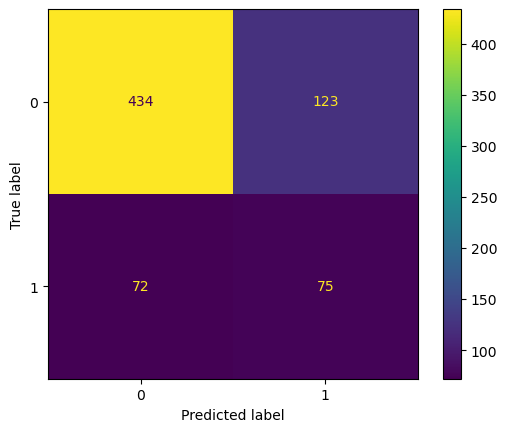

In [94]:
dtree_cm = confusion_matrix(Y_test,predicted)
display = ConfusionMatrixDisplay(dtree_cm)
display.plot()
#plot_confusion_matrix(estimator=dtree,X=X_test,y_true=Y_test)

In [70]:
importance = X_test.nunique().reset_index()

In [71]:
importance['importance'] = dtree.feature_importances_

In [72]:
importance.drop(0,axis=1,inplace=True)
importance.sort_values(by='importance',inplace=True)

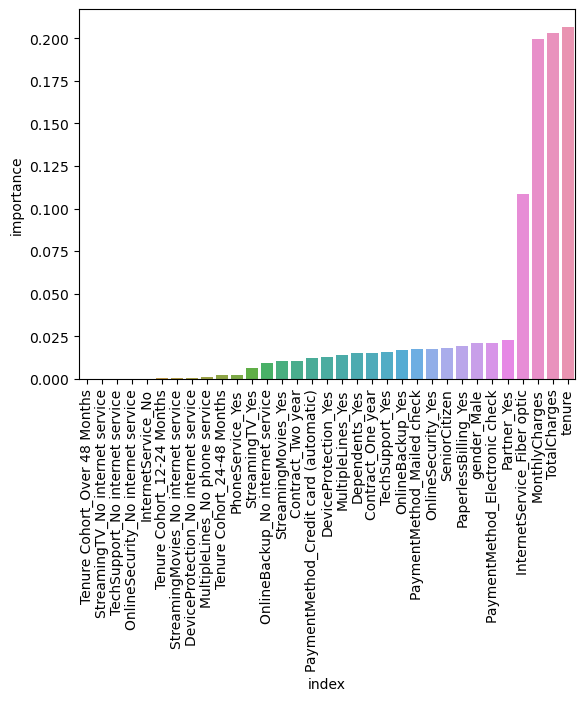

In [73]:
sns.barplot(data=importance,x='index',y='importance')
plt.xticks(rotation=90)
plt.show()

In [74]:
from sklearn.tree import plot_tree

In [ ]:
#Plot tree
#plot_tree(decision_tree=dtree,filled=True,feature_names=X.columns)

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini',n_jobs=-1,random_state=101)

In [77]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1, random_state=101)

In [78]:
predict_RFC = rfc.predict(X_test)

In [79]:
print(classification_report(Y_test,predict_RFC))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       557
           1       0.49      0.43      0.46       147

    accuracy                           0.79       704
   macro avg       0.67      0.66      0.66       704
weighted avg       0.78      0.79      0.78       704



<Figure size 1200x1200 with 0 Axes>

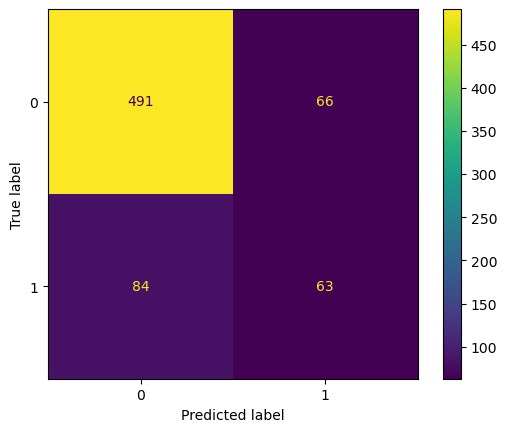

In [95]:
plt.figure(figsize=(12,12))
rfc_cm = confusion_matrix(Y_test,predict_RFC)
display = ConfusionMatrixDisplay(rfc_cm)
display.plot()
#plot_confusion_matrix(estimator=rfc,X=X_test,y_true=Y_test)

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

# AdaBoost

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
clf_AdaBoost = AdaBoostClassifier(n_estimators=1000,random_state=101)

In [84]:
clf_AdaBoost.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=1000, random_state=101)

In [85]:
predicted_clf_AdaBoost = clf_AdaBoost.predict(X_test)

In [86]:
print(classification_report(Y_test,predicted_clf_AdaBoost))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       557
           1       0.60      0.53      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



<Figure size 1200x1200 with 0 Axes>

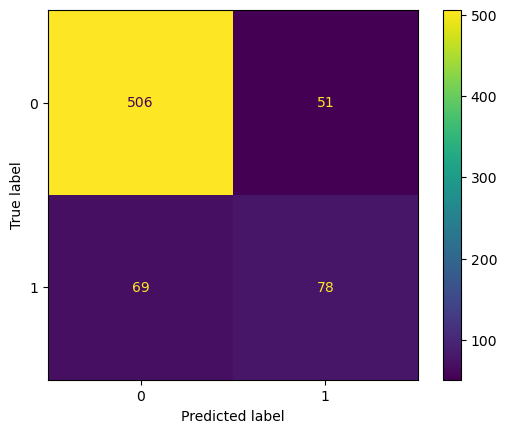

In [96]:
plt.figure(figsize=(12,12))
ada_cm = confusion_matrix(Y_test,predicted_clf_AdaBoost)
display = ConfusionMatrixDisplay(ada_cm)
display.plot()
#plot_confusion_matrix(estimator=clf_AdaBoost,X=X_test,y_true=Y_test)

# GradientBoosting

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
clf_GBoost = GradientBoostingClassifier(n_estimators=1000,random_state=101)

In [90]:
clf_GBoost.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=101)

In [91]:
predicted_clf_GBoost = clf_GBoost.predict(X_test)

In [92]:
print(classification_report(Y_test,predicted_clf_GBoost))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       557
           1       0.51      0.48      0.50       147

    accuracy                           0.80       704
   macro avg       0.69      0.68      0.69       704
weighted avg       0.79      0.80      0.79       704



<Figure size 1200x1200 with 0 Axes>

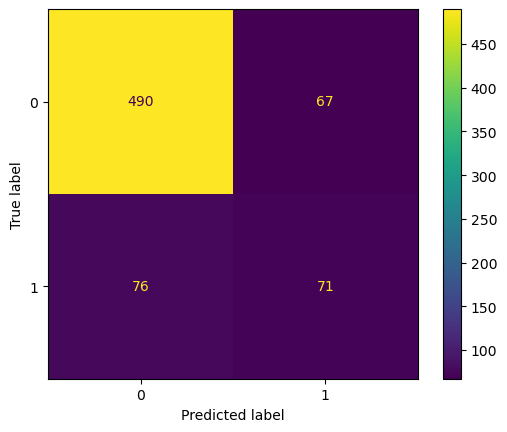

In [97]:
plt.figure(figsize=(12,12))
gb_cm = confusion_matrix(Y_test,predicted_clf_GBoost)
display = ConfusionMatrixDisplay(gb_cm)
display.plot()
#plot_confusion_matrix(estimator=clf_GBoost,X=X_test,y_true=Y_test)

# got best performance from an AdaBoostClassifier